In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv("/home/ravindra/Downloads/CarPrice_Assignment.csv")
df.head()
print(df.columns)
print(df.shape[1])
print(df.aspiration)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
26
0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object


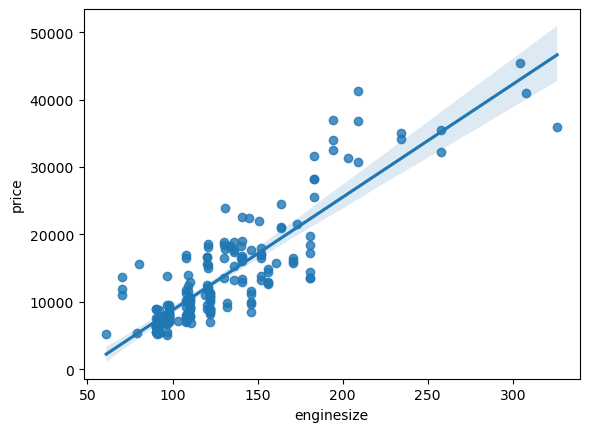

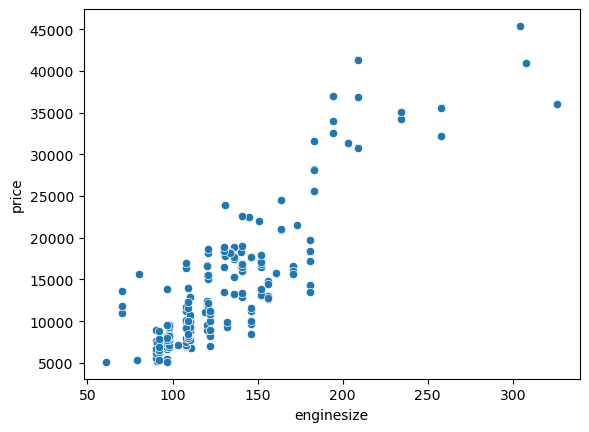

16


<AxesSubplot:xlabel='enginesize', ylabel='price'>

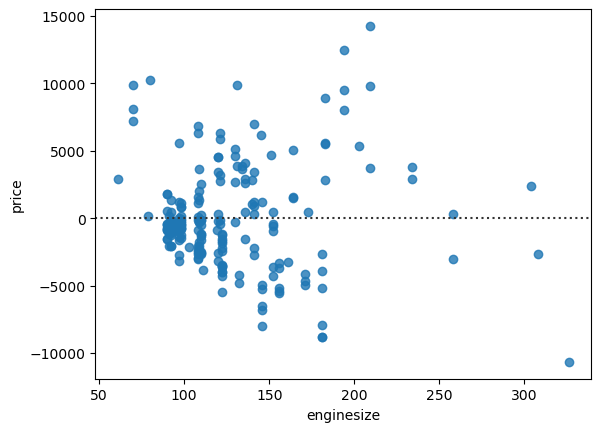

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df.enginesize,y=df.price)#just to check the relatiopn...if fit for lr or not
plt.show()
sns.scatterplot(x=df.enginesize,y = df.price)
plt.show()
#we can actually check for all numerical columns 
numerical = []
for col in df.columns :
    if df[col].dtype in ["int64","float64"]:
        numerical.append(col)
print(len(numerical))
#numerical.len()
sns.residplot(x=df.enginesize,y = df.price)


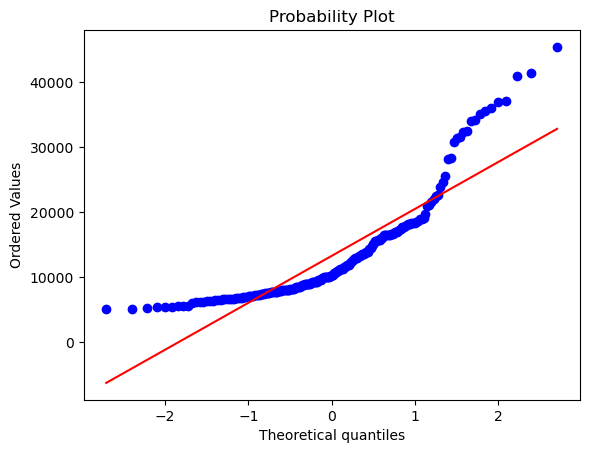

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)


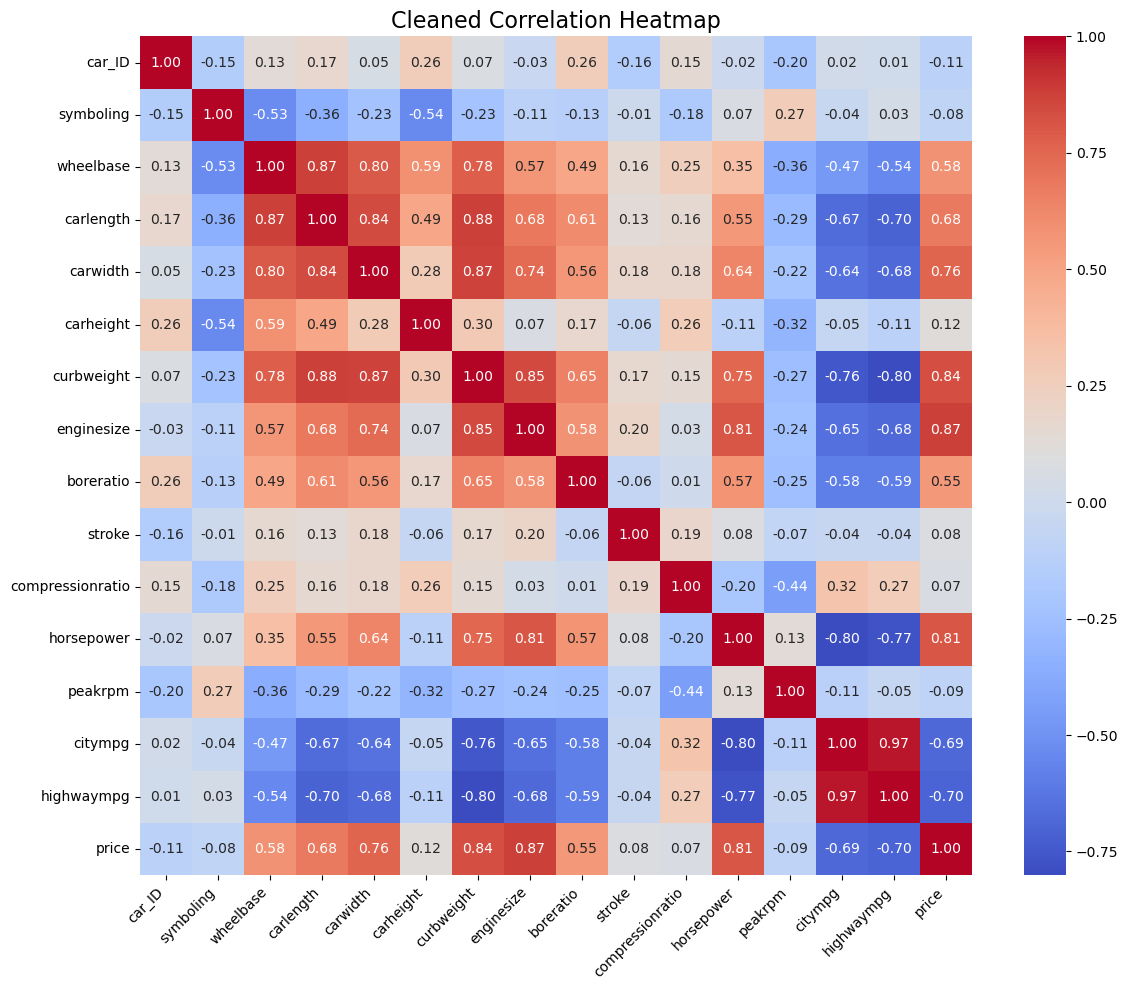

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

In [96]:
#lets use probplot to predict if our target variable sis following a certain distribution or not
import scipy.stats as stats
import numpy as np
stats.probplot(df.price,dist='norm',plot = plt)
plt.show()
#the more the curvbe and starightline are aligned ...the more the target is distributed normally 
#time for a normale test
print(normaltest(df.price.values))
#seeing the values...not a normal distribution :(
#from the residplot this distribution is not even followinbg Homoscedasticity   ...so when bith are not working ...log transformation is preffered
tdf = np.log(df.price)

corr = df.select_dtypes('number').corr()
plt.figure(figsize=(12, 10))  # Bigger figure
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)               # Keep y labels straight
plt.title("Cleaned Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()
print(corr)

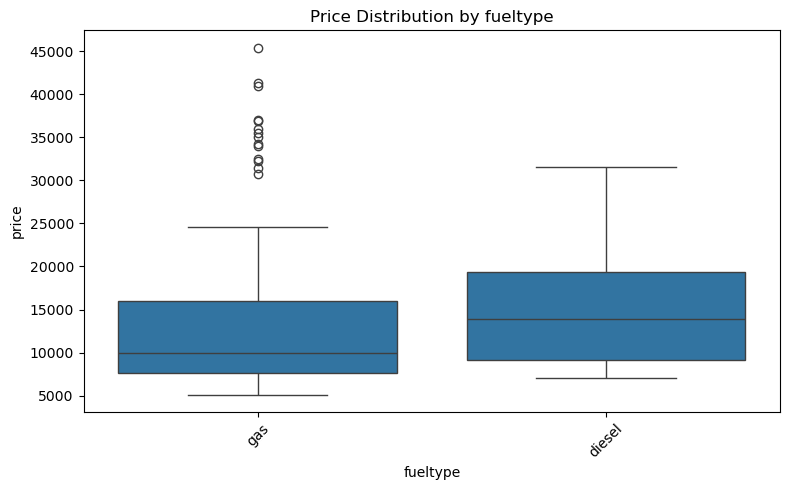

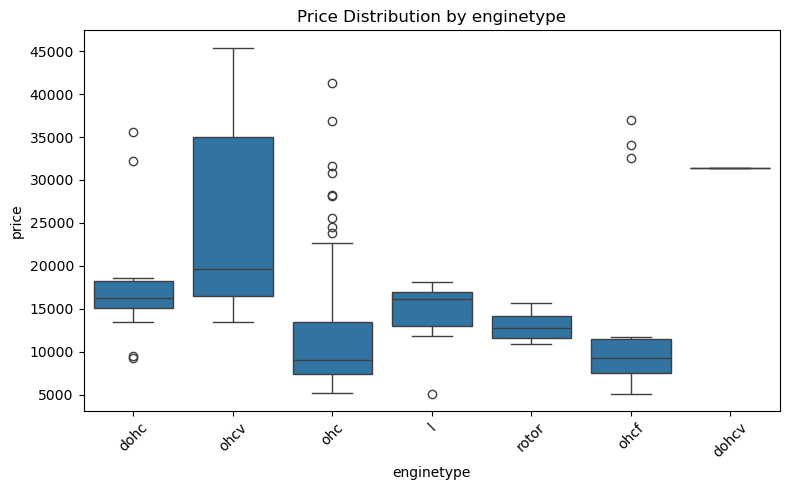

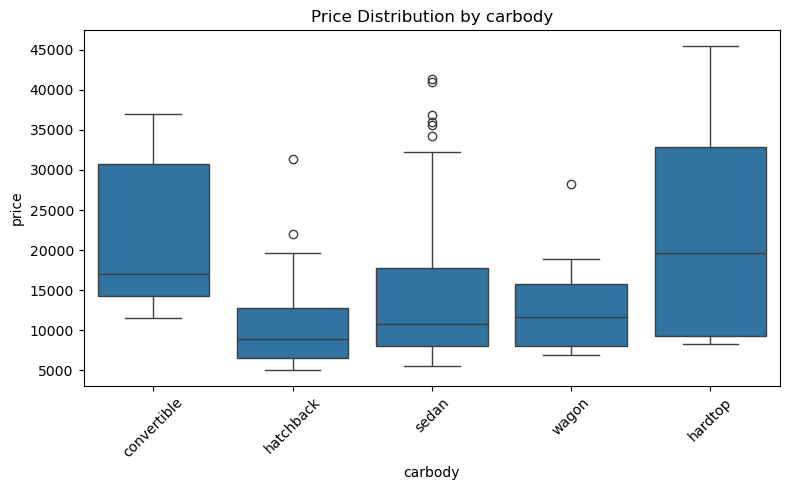

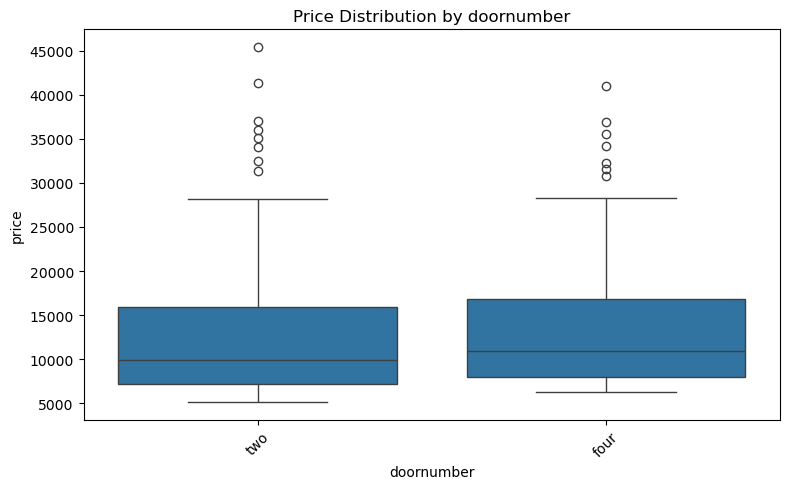

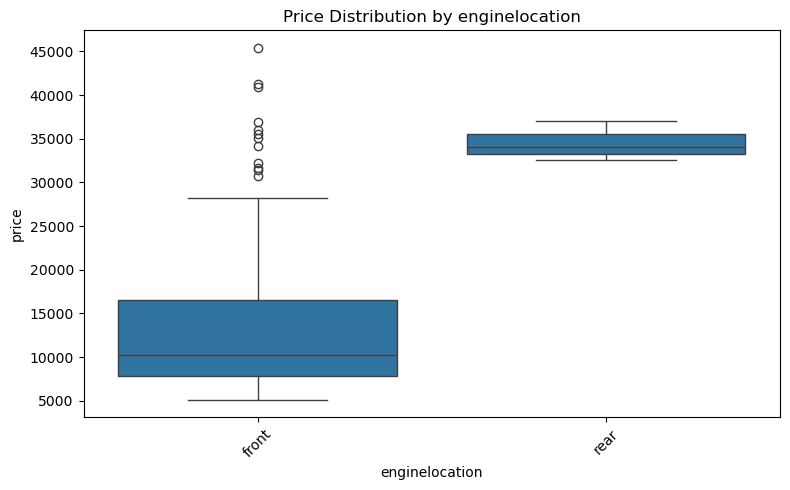

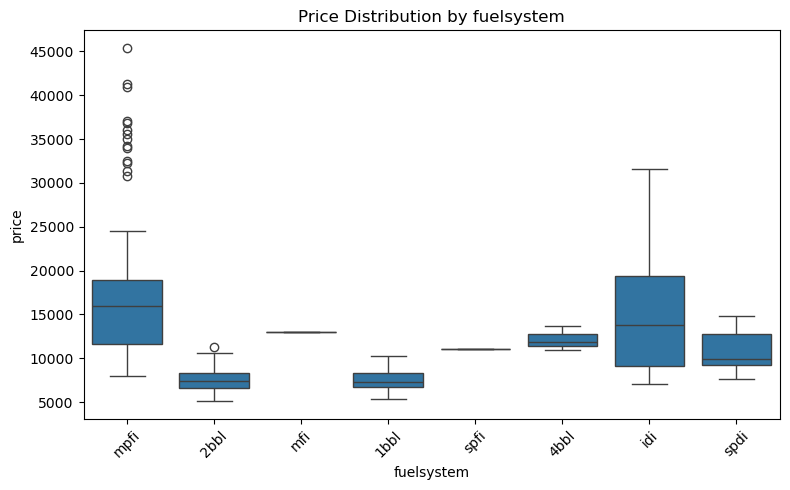

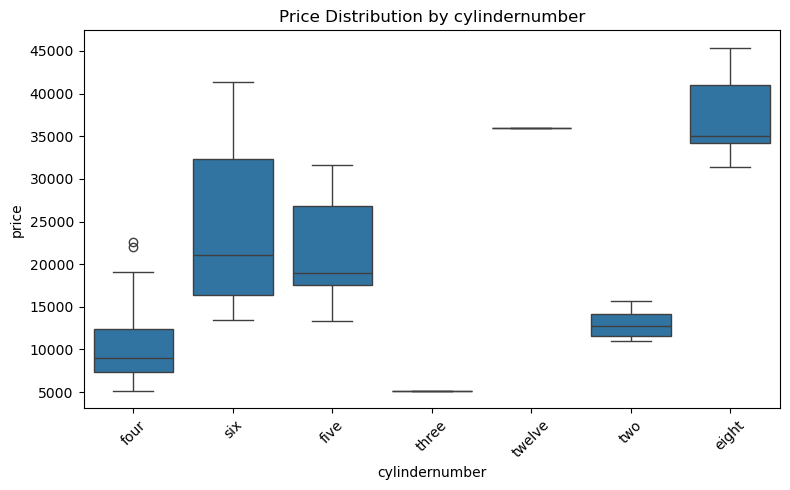

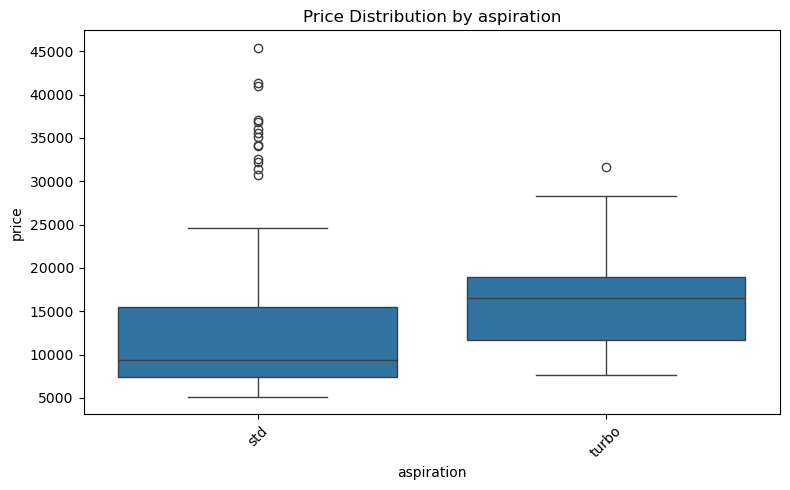

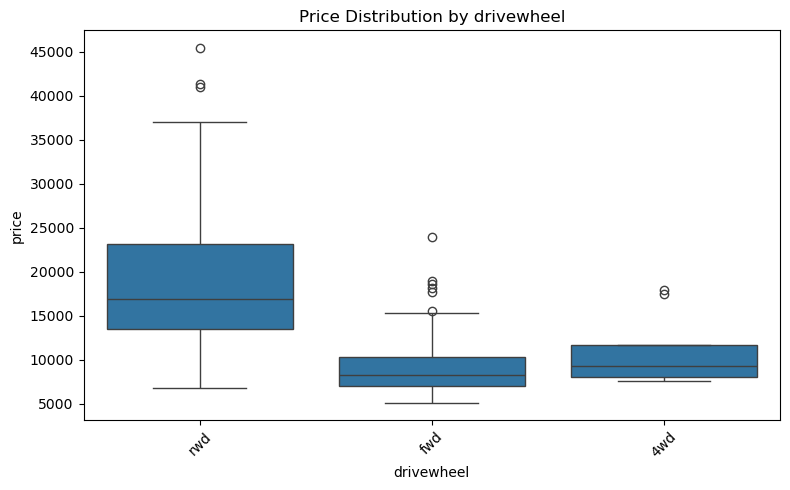

In [102]:
cat_columns = [
     'fueltype', 'enginetype', 'carbody',
    'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
    'aspiration', 'drivewheel'
]

for col in cat_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [99]:
from scipy.stats import boxcox
tdf1 = boxcox(df.price)
print(tdf1)

(array([1.58809728, 1.5885782 , 1.5885782 , 1.58818084, 1.58870165,
       1.58839694, 1.58873354, 1.58887252, 1.58931822, 1.5887515 ,
       1.58856864, 1.58863482, 1.58907768, 1.58909004, 1.58936846,
       1.58973506, 1.59014376, 1.58999534, 1.58472782, 1.58560648,
       1.58578295, 1.58508524, 1.58565946, 1.5865021 , 1.58556301,
       1.58585311, 1.58634117, 1.58675464, 1.58689363, 1.58799376,
       1.58572384, 1.5859476 , 1.58494386, 1.5857548 , 1.58609845,
       1.58618533, 1.58618533, 1.58647428, 1.58695704, 1.5868653 ,
       1.58734604, 1.58798993, 1.58736064, 1.58590747, 1.58689197,
       1.58689197, 1.58755444, 1.5898058 , 1.58994502, 1.58996238,
       1.58476737, 1.5854724 , 1.58591325, 1.58585488, 1.58623613,
       1.58752732, 1.58775122, 1.58812533, 1.58845676, 1.5868653 ,
       1.58672954, 1.58743195, 1.58733132, 1.58748706, 1.58760519,
       1.58880088, 1.58880822, 1.58943648, 1.58960224, 1.58959815,
       1.58977561, 1.58989005, 1.58992554, 1.59013285, 1.5902

In [104]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.metrics impo
# --------- SELECTED FEATURES ---------
numeric_features = [
    'curbweight', 'carlength', 'carwidth', 'enginesize',
    'boreratio', 'horsepower', 'wheelbase', 'citympg', 'highwaympg'
]

categorical_features = [
    'enginetype', 'fueltype', 'carbody', 'aspiration',
    'cylindernumber', 'drivewheel'
]

# --------- SELECT RELEVANT DATA ---------
X = df[numeric_features + categorical_features]
y = df['price']

# --------- Train-Test Split ---------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------- Transformations ---------

# Apply sqrt transformation to numeric features
sqrt_transformer = Pipeline(steps=[
    ('sqrt', FunctionTransformer(np.sqrt, feature_names_out='one-to-one'))
])

# OneHot encode categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', sqrt_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# --------- Full Pipeline ---------
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --------- Apply log transformation to target ---------
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# --------- Fit the model ---------
model_pipeline.fit(X_train, y_train_log)

# --------- Predict and Evaluate ---------
y_pred_log = model_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.936821537823871
RMSE: 2233.2849878994375
